<a href="https://colab.research.google.com/github/jyotikamaljha22/Project/blob/Main/Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Reading the input data
%cd /gdrive/MyDrive/Fraud
df=pd.read_csv('Fraud.csv')

/gdrive/MyDrive/Fraud


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
# Cloumn named nameOrig and nameDest are not required
df1= df.drop(df.columns[[3,6]],axis=1)

In [17]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [18]:
import seaborn as sns


[Text(0.5, 1.0, 'Transaction Type vs Fraud')]

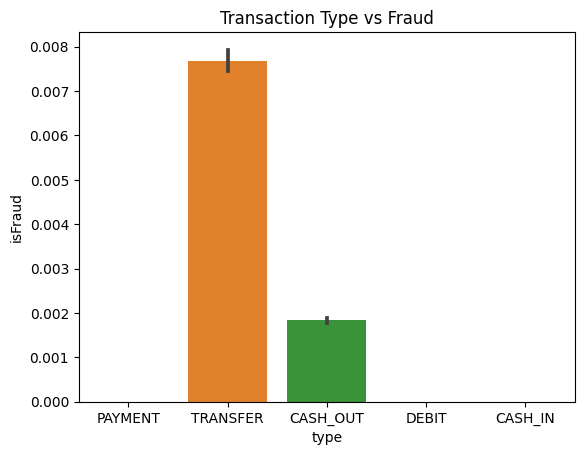

In [19]:
sns.barplot(x='type',y='isFraud',data=df1).set(title="Transaction Type vs Fraud")

In [20]:
# We can see that only transcation type TRANSFER and CASH_OUT type contains Fraud.


<Axes: >

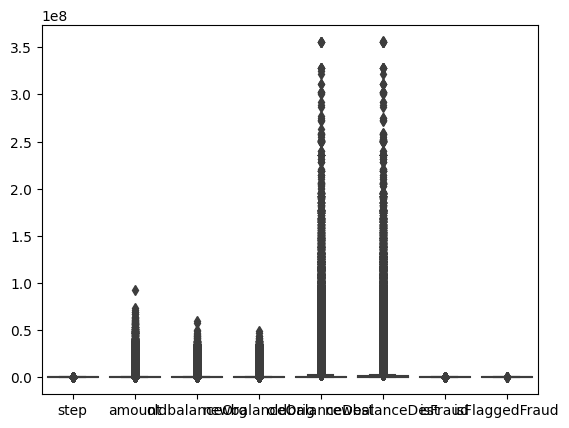

In [24]:
sns.boxplot(df1)


In [26]:
# Replaced the 'type' column into numerical values
df1['type'].replace(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                        [1,3,0,4,2], inplace=True)
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,3,181.00,181.00,0.00,0.00,0.00,1,0
3,1,0,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,3,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,3,850002.52,850002.52,0.00,0.00,0.00,1,0


<Axes: >

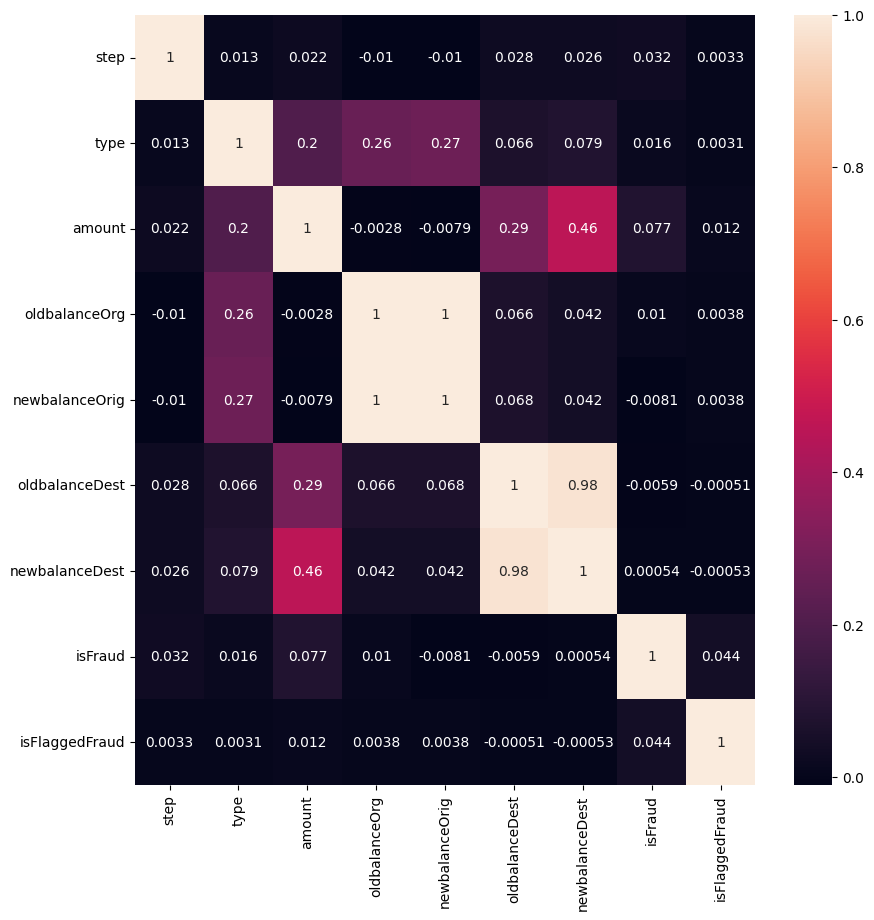

In [27]:
corr=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [28]:
# On checking the heatmap: [oldbalanceOrg and newbalanceOrig] and [oldbalanceDest and newbalanceDest] are almost similar. We can drop anyone of them
df1.drop(['oldbalanceOrg','oldbalanceDest'],axis=1,inplace=True)
df1

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,160296.36,0.00,0,0
1,1,1,1864.28,19384.72,0.00,0,0
2,1,3,181.00,0.00,0.00,1,0
3,1,0,181.00,0.00,0.00,1,0
4,1,1,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...
6362615,743,0,339682.13,0.00,339682.13,1,0
6362616,743,3,6311409.28,0.00,0.00,1,0
6362617,743,0,6311409.28,0.00,6379898.11,1,0
6362618,743,3,850002.52,0.00,0.00,1,0


In [29]:
# Train_Test_Split Data Set
x=df1.drop(['isFraud','isFlaggedFraud'],axis=1).values
y=df1['isFraud']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=40)


In [30]:
# Using Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred=dtc.predict(x_test)
print("Decision Tree Classifier accuracy is = ", accuracy_score(y_test,y_pred))

Decision Tree Classifier accuracy is =  0.9992418217652477
